In [1]:
import pandas as pd
import json
import  tarfile
import bz2
import os
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from nltk import agreement
import statsmodels.formula.api as smf
sns.set_style('whitegrid')
%matplotlib inline
import random
import matplotlib.patches as mpatches
import math

import multiprocessing
import json
import os
import re
import datetime
import time
import pprint
from datetime import datetime
from datetime import timedelta
import pytz
import glob
from random import sample
import pickle
from datetime import date, timedelta
from scipy import stats

In [2]:
df_aggregated = pd.read_pickle('topics_and_pos_df_aggregated.pickle')

In [106]:
#personal_concerns, bilogogical and social processes
tags =  ['Work:',
    'Achiev:',
    'Leisure:',
    'Home:',
    'Money:',
    'Relig:',
    'Death:',
    'Friends:',
    'Family:',
    'Humans:',
    'Body:',
    'Health:',
    'Sexual:',
    'Ingest:']

In [107]:
len(tags)

14

In [108]:
row = df_aggregated.loc[df_aggregated['topic'] == 'TOTAL NUMBER'].iloc[0]
total_n_tweets = row['number_of_tweets']

#thse are overall probabilities of observing some legths
h1_total = np.array([row['histogram_characters_2017'][i] if i in row['histogram_characters_2017'].index else 0 for i in range(1,281)])
h2_total = np.array([row['histogram_characters_2019'][i] if i in row['histogram_characters_2019'].index else 0 for i in range(1,281)])
 

In [109]:
df_aggregated['p(T)'] = df_aggregated['number_of_tweets']/total_n_tweets

In [126]:
topics = []

quantity_140_before = []
quantity_140_after = []
quantity_280_after = []

for topic,row in df_aggregated.iterrows():
    if row['topic'] in tags:
        n1 = np.array([row['histogram_characters_2017'][i] if i in row['histogram_characters_2017'].index else 0 \
                           for i in range(1,281)])
        #P(T|L) before
        #print(list(n1 / h1_total))
        #print(n1 / h1_total)
    
        quantity_140_before.append(list((n1 / h1_total)/ row['p(T)'])[139])

        n2 = np.array([row['histogram_characters_2019'][i] if i in row['histogram_characters_2019'].index else 0 \
                           for i in range(1,281)])
        #P(T|L) after
        #print(list(n2 / h2_total))
        quantity_140_after.append(list((n2 / h2_total)/ row['p(T)'])[139])
        quantity_280_after.append(list((n2 / h2_total)/ row['p(T)'])[279])
        topics.append(row['topic'])




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


In [127]:
quantity_140_before_sorted, topics_sorted_140, = zip(*sorted(zip(quantity_140_before, topics )))

quantity_280_after_sorted, topics_sorted_280, = zip(*sorted(zip(quantity_280_after, topics )))


In [128]:
topics_sorted_140

('Sexual:',
 'Body:',
 'Ingest:',
 'Family:',
 'Friends:',
 'Leisure:',
 'Health:',
 'Humans:',
 'Home:',
 'Relig:',
 'Death:',
 'Achiev:',
 'Money:',
 'Work:')

In [129]:
topics_sorted_280

('Sexual:',
 'Ingest:',
 'Body:',
 'Leisure:',
 'Friends:',
 'Family:',
 'Humans:',
 'Achiev:',
 'Health:',
 'Home:',
 'Relig:',
 'Work:',
 'Death:',
 'Money:')

In [130]:
colors = plt.cm.tab20b(np.linspace(0,1,14))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true

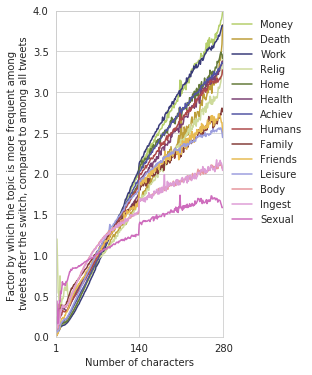

In [131]:
fig, ax = plt.subplots(1,1,figsize= (3,6))



for topic in topics_sorted_280[::-1]:
    row  = df_aggregated.loc[df_aggregated['topic'] == topic].iloc[0]


    #P(T|L) before
    #print(list(n1 / h1_total))
    #print(n1 / h1_total)


    n2 = np.array([row['histogram_characters_2019'][i] if i in row['histogram_characters_2019'].index else 0 \
                       for i in range(1,281)])

    plt.plot(list((n2 / h2_total)/ row['p(T)']), label = row['topic'][:-1], 
              color = colors[tags.index(topic)])
plt.xlim([1,280])
plt.xticks(np.concatenate(([1],range(0,281)[::140][1:])))
plt.ylim([0,4])        
plt.legend(ncol = 1, bbox_to_anchor = (1,1),frameon=False)
plt.ylabel('Factor by which the topic is more frequent among \n tweets after the switch, compared to among all tweets')
plt.xlabel("Number of characters")
#plt.yscale('log2')

plt.savefig("fign2.pdf", bbox_inches='tight')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true

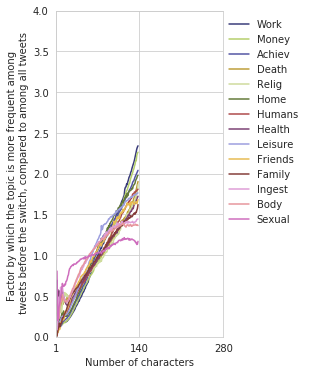

In [132]:
fig, ax = plt.subplots(1,1,figsize= (3,6))




for topic in topics_sorted_140[::-1]:
    row  = df_aggregated.loc[df_aggregated['topic'] == topic].iloc[0]


    #P(T|L) before
    #print(list(n1 / h1_total))
    #print(n1 / h1_total)


    n1 = np.array([row['histogram_characters_2017'][i] if i in row['histogram_characters_2017'].index else 0 \
                       for i in range(1,281)])

    plt.plot(list((n1 / h1_total)/ row['p(T)'])[:139], color = colors[tags.index(topic)],
             label = row['topic'][:-1])

plt.xlim([1,280])
plt.xticks(np.concatenate(([1],range(0,281)[::140][1:])))
plt.ylim([0,4])
plt.legend(ncol = 1, bbox_to_anchor = (1.5,1),frameon=False)
plt.ylabel('Factor by which the topic is more frequent among \n tweets before the switch, compared to among all tweets')
plt.xlabel("Number of characters")
#plt.yscale('log2')

plt.savefig("fign1.pdf", bbox_inches='tight')

In [133]:
stats.spearmanr(quantity_140_before,quantity_280_after)

SpearmanrResult(correlation=0.9076923076923077, pvalue=7.3017039968523426e-06)

In [134]:
stats.spearmanr(quantity_140_before,quantity_140_after)

SpearmanrResult(correlation=0.8373626373626375, pvalue=0.00018639737783200425)